# Preprocessing

## Initial setup

### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import warnings
warnings.filterwarnings('ignore')

### Dataset reading

In [2]:
original_df = pd.read_csv('../data/dataset.csv')
print(f"Dataset loaded: {original_df.shape[0]} rows × {original_df.shape[1]} columns")
print(original_df.columns)

Dataset loaded: 21742 rows × 58 columns
Index(['Unnamed: 0', 'id', 'title', 'subtitle', 'sq_mt_built', 'sq_mt_useful',
       'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'latitude',
       'longitude', 'raw_address', 'is_exact_address_hidden', 'street_name',
       'street_number', 'portal', 'floor', 'is_floor_under', 'door',
       'neighborhood_id', 'operation', 'rent_price', 'rent_price_by_area',
       'is_rent_price_known', 'buy_price', 'buy_price_by_area',
       'is_buy_price_known', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'built_year', 'has_central_heating',
       'has_individual_heating', 'are_pets_allowed', 'has_ac',
       'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden',
       'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room',
       'is_furnished', 'is_kitchen_equipped', 'is_accessible',
       'has_green_zones', 'energy_certificate', 'has_parking',
       'has_private_parking', 'has_public_parking',
     

We just keep the columns we will be processing

In [3]:
COLUMNS = ['has_ac', 'has_pool']
PARKING_COLUMNS = ['has_parking', 'has_private_parking', 'has_public_parking', 'is_parking_included_in_price']
ORIENTATION_COLUMNS = ['is_orientation_north', 'is_orientation_east', 'is_orientation_south', 'is_orientation_west']
df = original_df[COLUMNS + PARKING_COLUMNS + ORIENTATION_COLUMNS]

### NaN analysis

We display the information of NaN (null) for by columns

In [4]:
nulls = df.isnull().mean() * 100
print("NaN percentage by column:")
display(nulls.sort_values(ascending=False))

NaN percentage by column:


has_public_parking              100.000000
has_private_parking             100.000000
has_pool                         76.216539
is_parking_included_in_price     64.497286
has_ac                           48.436206
is_orientation_north             47.760096
is_orientation_south             47.760096
is_orientation_east              47.760096
is_orientation_west              47.760096
has_parking                       0.000000
dtype: float64

### Distinct values analysis

Distinct values in has_ac:
has_ac
VERDADERO    11200
NaN          10531
1               11
Name: count, dtype: int64
---------
Distinct values in has_pool:
has_pool
NaN          16571
VERDADERO     5167
1                4
Name: count, dtype: int64
---------
Distinct values in has_parking:
has_parking
FALSO        14003
VERDADERO     7714
0               20
1                5
Name: count, dtype: int64
---------
Distinct values in has_private_parking:
has_private_parking
NaN    21742
Name: count, dtype: int64
---------
Distinct values in has_public_parking:
has_public_parking
NaN    21742
Name: count, dtype: int64
---------
Distinct values in is_parking_included_in_price:
is_parking_included_in_price
NaN          14023
VERDADERO     7110
FALSO          604
1                5
Name: count, dtype: int64
---------
Distinct values in is_orientation_north:
is_orientation_north
NaN          10384
FALSO         8559
VERDADERO     2790
0                8
1                1
Name: count, dtype: int

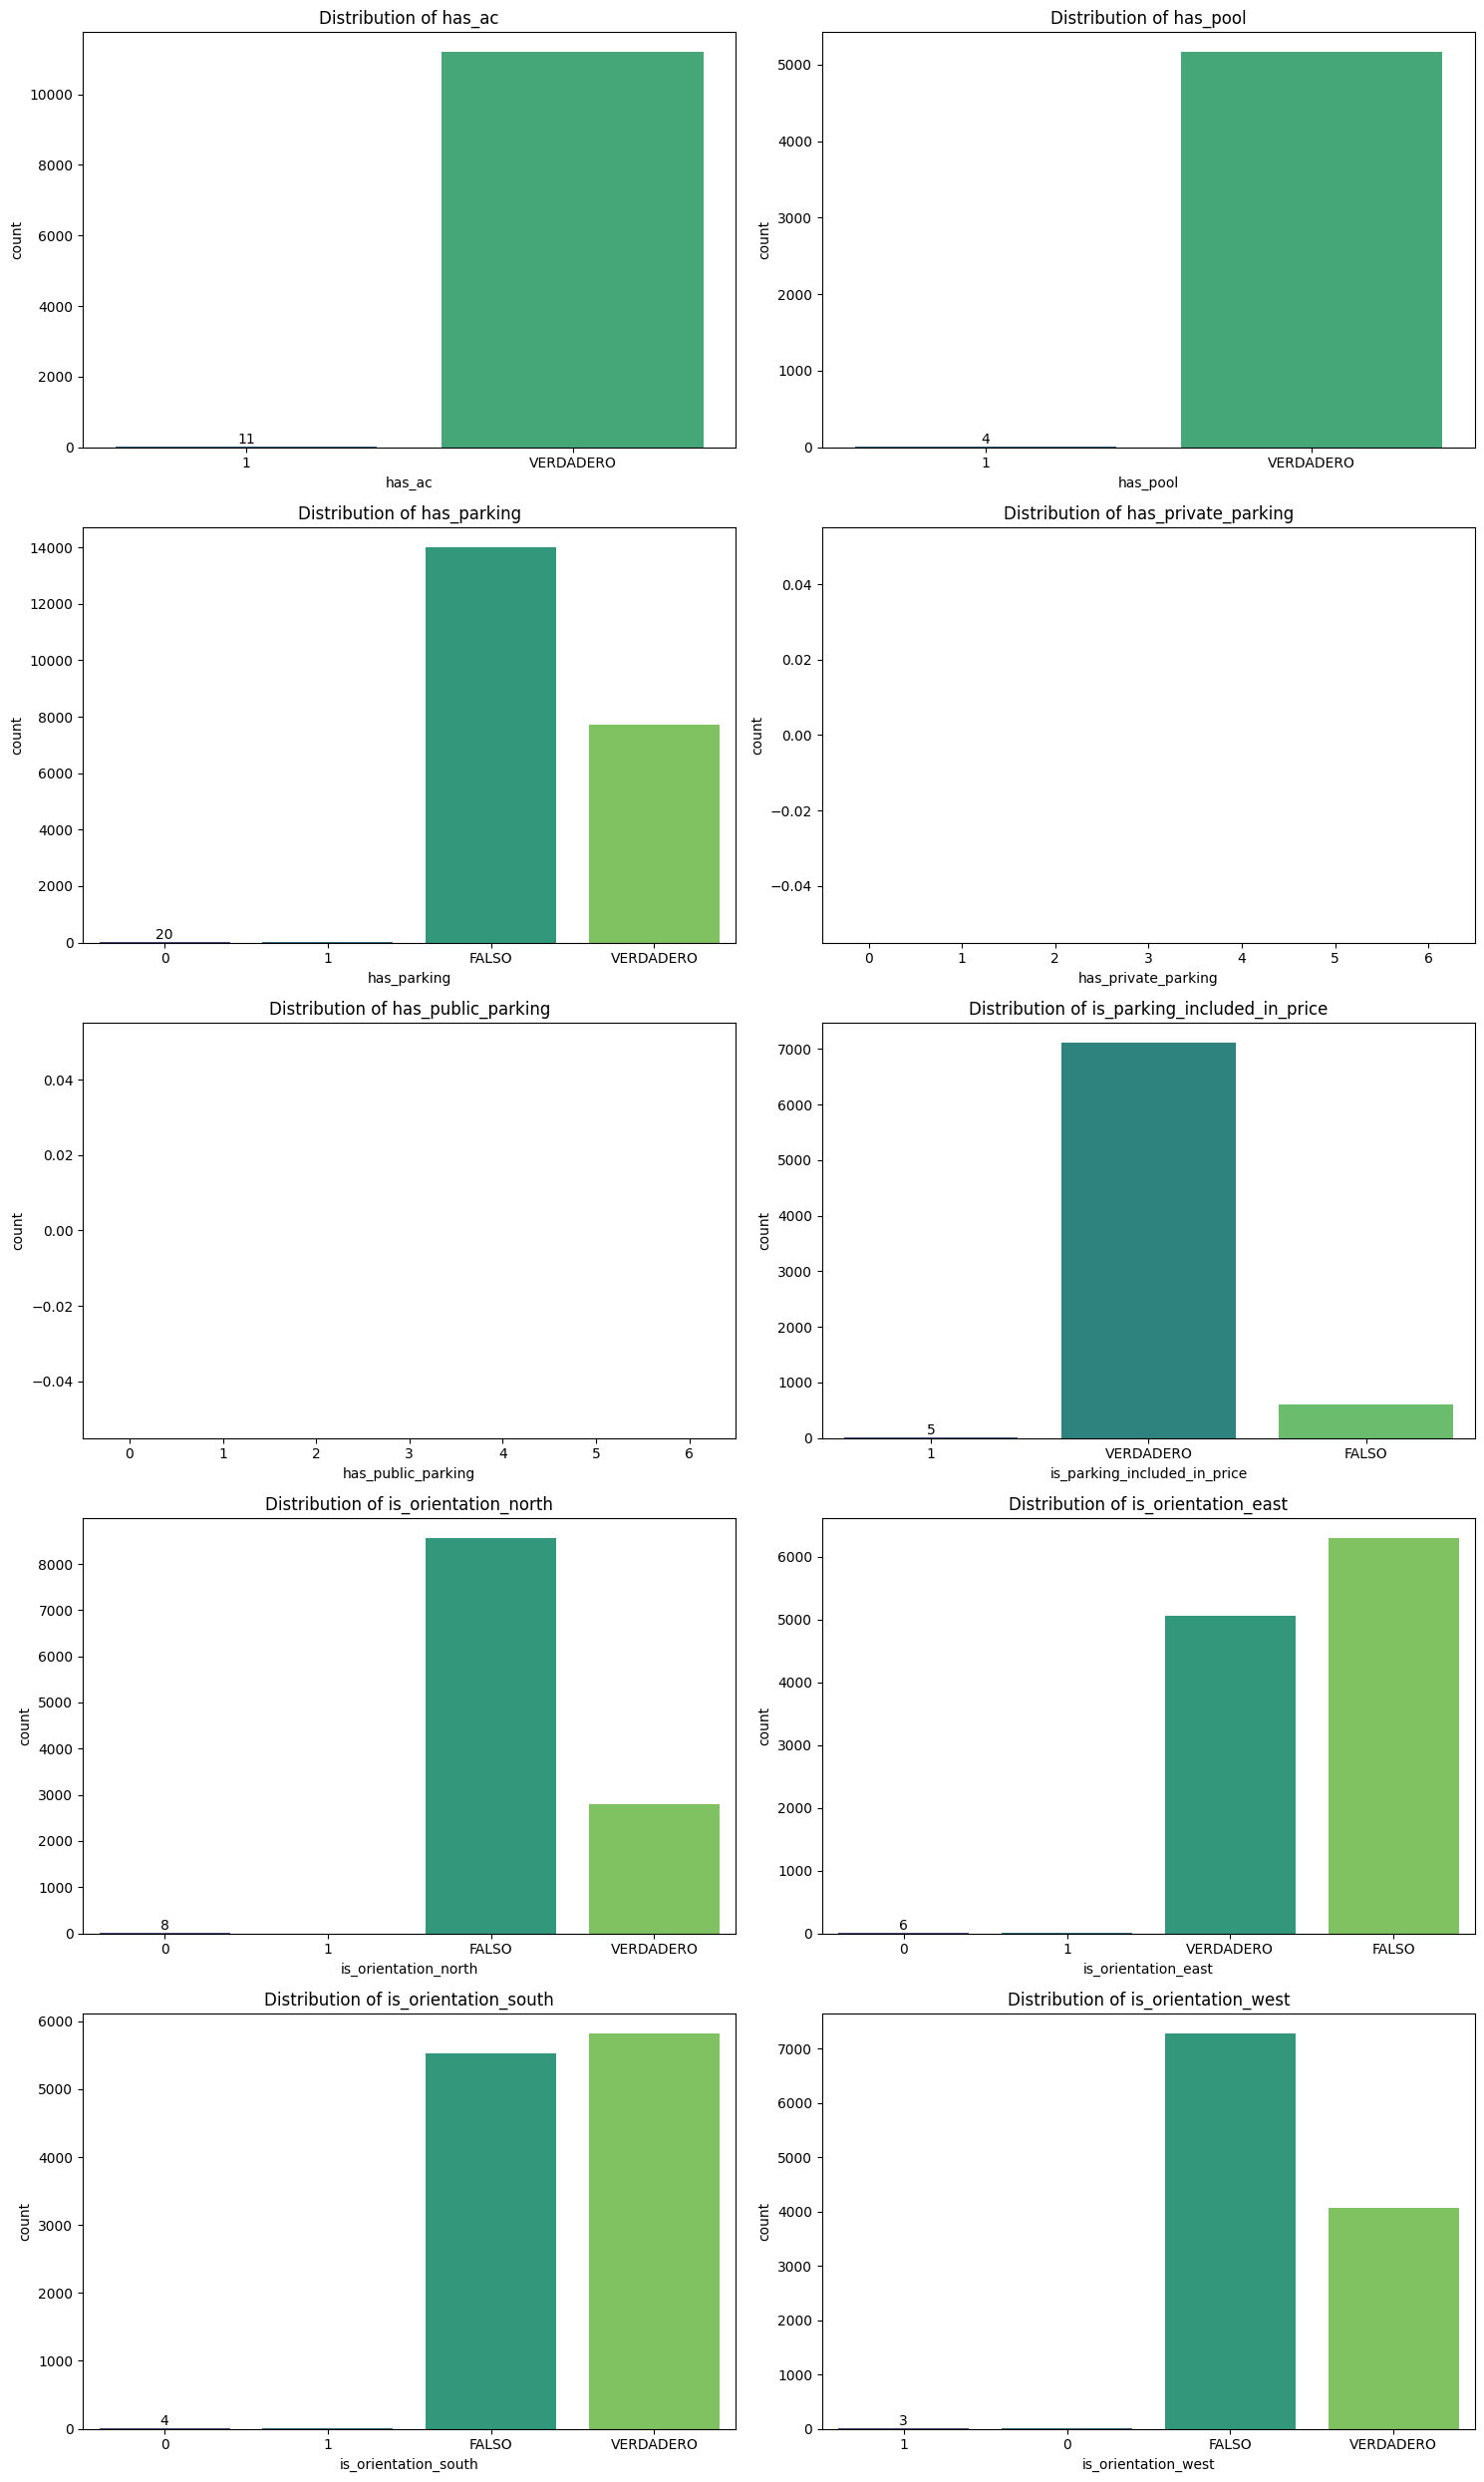

In [5]:
# Iterate through all columns to display distinct values
for column in df.columns:
    print(f"Distinct values in {column}:")
    print(df[column].value_counts(dropna=False))
    print('---------')

# Get the columns we're working with
columns_to_plot = df.columns
print(f"Columns being plotted: {columns_to_plot}")

# Create a grid of subplots with 2 columns
num_cols = len(columns_to_plot)
cols = 2
rows = num_cols // cols  # Calculate rows needed (ceiling division)
fig_height = rows * 5  # 5 pixels per row

fig, axes = plt.subplots(rows, cols, figsize=(15, fig_height))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through columns and create plots
for i, column in enumerate(columns_to_plot):
    if i < len(axes):  # Make sure we don't exceed the number of subplots
        sns.countplot(x=column, data=df, ax=axes[i], palette='viridis')
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)
        # Check if the container has elements before trying to label bars
        if axes[i].containers and len(axes[i].containers) > 0:
            axes[i].bar_label(axes[i].containers[0])

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Column preprocessing

### Preprocess floor column

#### Standarization


### Preprocess has pool column

#### Standarization and renaming

In [6]:
has_pool_map = {
    '1' : 1,
    'VERDADERO' : 1,
}

df['has_pool'] = df['has_pool'].replace(has_pool_map)

print("Valores únicos en has_pool:")
print(df['has_pool'].value_counts(dropna=False))

Valores únicos en has_pool:
has_pool
NaN    16571
1.0     5171
Name: count, dtype: int64


#### Imputation of missing values

The missing values are false values.

In [7]:
df['has_pool'].fillna(0, inplace=True)

print("Valores únicos en has_pool:")
print(df['has_pool'].value_counts(dropna=False))

Valores únicos en has_pool:
has_pool
0.0    16571
1.0     5171
Name: count, dtype: int64


### Preprocess has air conditioner column

#### Standarization and renaming

In [8]:
has_ac_map = {
    '1' : 1,
    'VERDADERO' : 1,
}

df['has_ac'] = df['has_ac'].replace(has_ac_map)

print("Valores únicos en has_ac:")
print(df['has_ac'].value_counts(dropna=False))

Valores únicos en has_ac:
has_ac
1.0    11211
NaN    10531
Name: count, dtype: int64


#### Imputation of missing values

There are no missing values

In [9]:
df['has_ac'].fillna(0, inplace=True)

print("Valores únicos en has_ac:")
print(df['has_ac'].value_counts(dropna=False))

Valores únicos en has_ac:
has_ac
1.0    11211
0.0    10531
Name: count, dtype: int64


### Preprocess has parking column

#### Explanation of different source of variables

There are 4 columns from the original dataset that describe things about the parking.

has_private_parking and has_public_parking do not provide any relevant information as all of their values are missing.

is_parking_included_in_price does not provide any extra information neither because all the available parkings are included in the price, so only has_parking provides valuable information.

In [10]:
# Count parkings that are not included in price
parkings_not_included = df[(df['has_parking'].isin(['1', 'VERDADERO'])) & 
                           (df['is_parking_included_in_price'].isna())].shape[0]

# Additional counts for context
parkings_included = df[(df['has_parking'].isin(['1', 'VERDADERO'])) & 
                       (df['is_parking_included_in_price'].notna())].shape[0]
total_parkings = df[df['has_parking'].isin(['1', 'VERDADERO'])].shape[0]

print("\nParking inclusion analysis:")
print(f"Parkings not included in price: {parkings_not_included}")
print(f"Parkings included in price: {parkings_included}")
print(f"Total properties with parking: {total_parkings}")



Parking inclusion analysis:
Parkings not included in price: 0
Parkings included in price: 7719
Total properties with parking: 7719


#### Standarization and renaming

In [11]:
has_parking_map = {
    '1' : 1,
    'VERDADERO' : 1,
    'FALSO' : 0,
    '0' : 0,
}

df['has_parking'] = df['has_parking'].replace(has_parking_map)

print("Valores únicos en has_parking:")
print(df['has_parking'].value_counts(dropna=False))

Valores únicos en has_parking:
has_parking
0    14023
1     7719
Name: count, dtype: int64


#### Imputation of missing values

There are no missing values.

### Preprocess orientation column

#### Standarization and renaming

In [12]:
orientation_map = {
    '1' : 1,
    'VERDADERO' : 1,
}

for col in ORIENTATION_COLUMNS:
    df[col] = df[col].replace(orientation_map)

def combine_orientations(row):
    north = row['is_orientation_north']
    east = row['is_orientation_east']
    south = row['is_orientation_south']
    west = row['is_orientation_west']
    
    if north == 1 and east == 1 and south == 1 and west == 1:
        return 'all'
    
    orientations = []
    if north == 1:
        orientations.append('north')
    if east == 1:
        orientations.append('east')
    if south == 1:
        orientations.append('south')
    if west == 1:
        orientations.append('west')
    
    if not orientations:
        return 'unknown'
    
    return '-'.join(orientations)

df['orientation'] = df.apply(combine_orientations, axis=1)
print("Valores únicos en orientation:")
print(df['orientation'].value_counts(dropna=False))

Valores únicos en orientation:
orientation
unknown             10384
south                2522
east                 1797
west                 1383
east-south           1164
east-west             763
north                 744
south-west            711
north-south           530
all                   500
north-east            437
north-west            336
east-south-west       227
north-east-south       93
north-south-west       76
north-east-west        75
Name: count, dtype: int64


#### Imputation of missing values

As it is a categorical column, missing values have been converted to a new unknown class.

### Final processing

#### Delete old columns

In [13]:
# Drop orientation columns since we've created a combined 'orientation' column
if 'is_orientation_north' in df.columns:
    df.drop('is_orientation_north', axis=1, inplace=True)
if 'is_orientation_east' in df.columns:
    df.drop('is_orientation_east', axis=1, inplace=True)
if 'is_orientation_south' in df.columns:
    df.drop('is_orientation_south', axis=1, inplace=True)
if 'is_orientation_west' in df.columns:
    df.drop('is_orientation_west', axis=1, inplace=True)

# Drop redundant parking columns if they exist
if 'has_private_parking' in df.columns:
    df.drop('has_private_parking', axis=1, inplace=True)
if 'has_public_parking' in df.columns:
    df.drop('has_public_parking', axis=1, inplace=True)
if 'is_parking_included_in_price' in df.columns:
    df.drop('is_parking_included_in_price', axis=1, inplace=True)

## Final results

In [14]:
df.head()
nulls = df.isnull().mean() * 100
print("Porcentage de nulos por columna:")
display(nulls.sort_values(ascending=False))

Porcentage de nulos por columna:


has_ac         0.0
has_pool       0.0
has_parking    0.0
orientation    0.0
dtype: float64